# Example of usage with [Iris dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data)

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import NeuralNetwork

Iris datasets has 4 inputs and 3 classes corresponding 3 Iris species.

In [2]:
X = np.genfromtxt('iris.data', delimiter = ',', usecols = [0,1,2,3])
Y_labels = np.genfromtxt('iris.data', delimiter = ',', usecols = [4], dtype = str) 

X_size, number_of_inputs = X.shape
number_of_outputs = len(set(Y_labels))
n = X.shape[0]
labels = dict(zip(set(Y_labels), np.arange(len(set(Y_labels)))))

Y = np.zeros((X_size, number_of_outputs))
for i in range(X_size):
    Y[i, labels[Y_labels[i]]] = 1

In [3]:
X[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [4]:
Y[:10]

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

First 10 examples. 1 in 3rd position in y corresponds to 3rd class, same with 1st and 2nd.

In [5]:
n = NeuralNetwork.Network((number_of_inputs, 5, number_of_outputs))

Initialize neural network with 4 neurons in input layer, 5 in hidden layer and 3 in output layer. Also, there one hidden neuron in input and hidden layers. All weights are initialized randomly.

In [6]:
X_size = X.shape[0]
train_size = 50
train_ind = np.random.choice(X_size, train_size, replace = False)
test_ind = np.setdiff1d(np.arange(X_size), train_ind)
X_train, Y_train = X[train_ind], Y[train_ind]
X_test, Y_test = X[test_ind], Y[test_ind]

Randomly select 50 examples for training dataset and 100 for testing.

In [7]:
alpha = 0.1
lmb = 0

These are learning parameters. alpha is learning rate and lmb is regularization constant. In this example regularization isn't used.

In [8]:
J = n.GradDesc(X_train, Y_train, alpha = alpha, lmb = lmb, eps = 1e-4, MaxIter = 5000)

...
iteration 2080 	 J = 0.22790707179380876
iteration 2081 	 J = 0.2278062897002138
iteration 2082 	 J = 0.22770562499361735
iteration 2083 	 J = 0.22760507746664974
iteration 2084 	 J = 0.22750464691238165
iteration 2085 	 J = 0.2274043331243327
iteration 2086 	 J = 0.22730413589646148
iteration 2087 	 J = 0.22720405502317156
iteration 2088 	 J = 0.22710409029930767
--- GradDesc finished ---


Perform gradient descent to fit parameters. eps = 1e-4 means that algorithm stops when absolute difference in cost function values between two iterations is less than 0.0001.

In [9]:
accuracy_train = 0
for k in range(len(Y_train)):
    accuracy_train += np.argmax(n.h(X_train[k])) == np.argmax(Y_train[k])
print(f"\naccuracy on train = {accuracy_train/len(Y_train)} ({accuracy_train}/{len(Y_train)})")

accuracy_test = 0
for k in range(len(Y_test)):
    #print(n.h(X_test[k]), np.argmax(n.h(X_test[k])) == np.argmax(Y_test[k]))
    accuracy_test += np.argmax(n.h(X_test[k])) == np.argmax(Y_test[k])
print(f"accuracy on test = {accuracy_test/len(Y_test)} ({accuracy_test}/{len(Y_test)})")


accuracy on train = 0.98 (49/50)
accuracy on test = 0.95 (95/100)


Check accuracy on training and testing datasets.

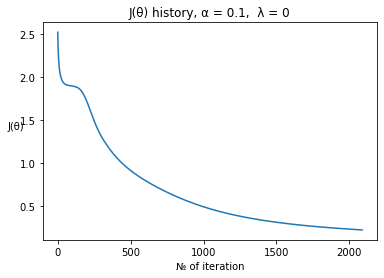

In [10]:
plt.plot(J)
plt.title(f'J(θ) history, α = {alpha},  λ = {lmb}')
plt.xlabel('№ of iteration')
plt.ylabel('J(θ)', rotation = 0)
plt.show()

Plot cost function J values depending on number of iteration.

In [11]:
demo_index = np.random.choice(np.arange(len(Y)), 10, replace = False)
np.set_printoptions(suppress=True)
print("neural network output \t\t\t correct output \t equals?")
for i in demo_index:
    print(f"{n.h(X[i])} \t {Y[i]} \t\t {np.argmax(n.h(X[i])) == np.argmax(Y[i])}")


neural network output 			 correct output 	 equals?
[0.78809872 0.11122503 0.02215454] 	 [1. 0. 0.] 		 True
[0.02211853 0.00148984 0.98134434] 	 [0. 0. 1.] 		 True
[0.23341145 0.79506108 0.00633966] 	 [1. 0. 0.] 		 False
[0.82845703 0.08502002 0.02314395] 	 [1. 0. 0.] 		 True
[0.94586321 0.01510882 0.08673889] 	 [1. 0. 0.] 		 True
[0.94044564 0.018423   0.06474729] 	 [1. 0. 0.] 		 True
[0.36494925 0.62171875 0.00649112] 	 [0. 1. 0.] 		 True
[0.9048796  0.03513221 0.02879651] 	 [1. 0. 0.] 		 True
[0.92505552 0.0254534  0.04335062] 	 [1. 0. 0.] 		 True
[0.08171454 0.95307888 0.00384718] 	 [0. 1. 0.] 		 True


Compare some neural network outputs with correct ones.